# K Nearest Neighbors(KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Satish\Desktop\Social_Network_Ads.csv')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.tail(10)

,Age,EstimatedSalary,Purchased
390,48,33000,1
391,47,23000,1
392,45,45000,1
393,60,42000,1
394,39,59000,0
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.shape

(400, 3)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [9]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Visualize the Data


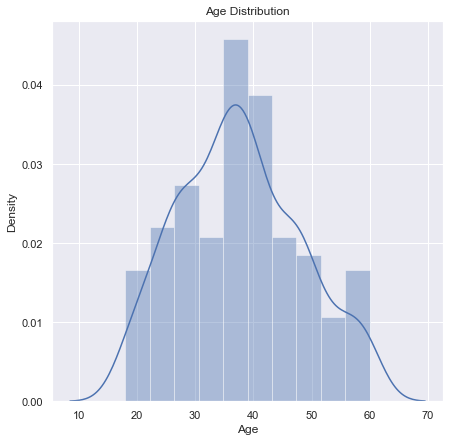

In [10]:
## Distribution of Age
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df["Age"])
plt.title("Age Distribution")
plt.show()

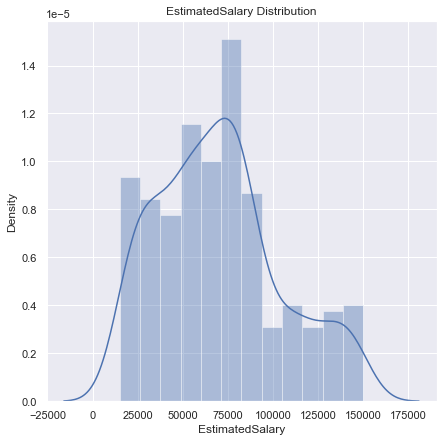

In [11]:
## Distribution of Estimated Salary
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df["EstimatedSalary"])
plt.title("EstimatedSalary Distribution")
plt.show()

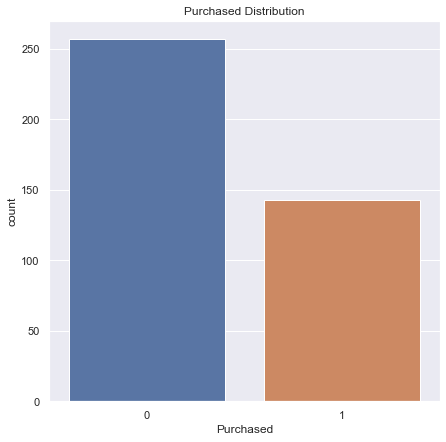

In [12]:
## Distribution of Purchased
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(df["Purchased"])
plt.title("Purchased Distribution")
plt.show()

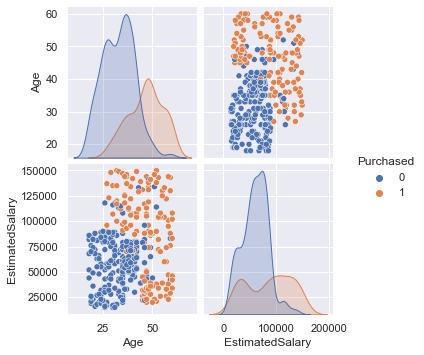

In [13]:

sns.pairplot(df,hue='Purchased')

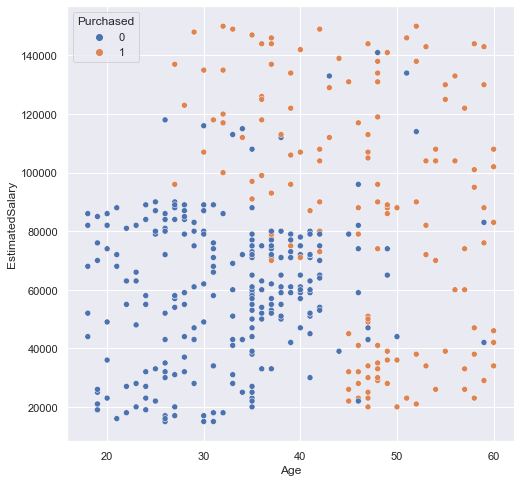

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age",y="EstimatedSalary",hue="Purchased",data=df)
plt.show()

In [15]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [16]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [17]:
y.unique()

array([0, 1], dtype=int64)

In [18]:
##Splitting the Dataset into the Training set and Test Set
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [20]:
print(x.shape,x_train.shape,x_test.shape)

(400, 2) (300, 2) (100, 2)


# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Using KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
y_pred = knn.predict(x_test)

In [27]:
pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred}).head()

,Actual Value,Predicted Value
332,0,0
111,0,0
352,1,0
205,0,1
56,0,0


# Predictions and Evaluations

In [28]:
# Let's evaluate our Knn model

In [29]:
knn.score(x_train,y_train)

0.9

In [30]:
knn.score(x_test,y_test)

0.93

#Choosing a K Value 

In [31]:
## let's go ahead and use the Accurategraph method to pick a good K value

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
accuracy_rate = []

In [34]:
#Will take some time
for i in range(1,50):
    
    Knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(Knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

In [35]:
print(accuracy_rate)

[0.8049999999999999, 0.7875, 0.7900000000000001, 0.7925, 0.7849999999999999, 0.7825, 0.7925, 0.7875, 0.7875, 0.76, 0.78, 0.7850000000000001, 0.7899999999999999, 0.78, 0.7725000000000001, 0.7675, 0.7625, 0.7775000000000001, 0.77, 0.7725, 0.7700000000000001, 0.78, 0.7700000000000001, 0.7775000000000001, 0.7825000000000001, 0.7925000000000001, 0.785, 0.775, 0.77, 0.7775000000000001, 0.7675000000000001, 0.7725000000000001, 0.7725000000000001, 0.7725000000000001, 0.7775000000000001, 0.7725, 0.775, 0.7775000000000001, 0.77, 0.7775000000000001, 0.7725, 0.7775000000000001, 0.775, 0.78, 0.775, 0.7775000000000001, 0.775, 0.7725, 0.775]


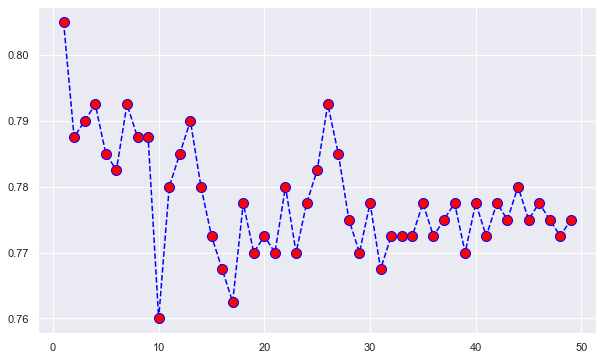

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue',linestyle='dashed',
        marker = 'o',
        markerfacecolor = 'red',
        markersize =10)

In [37]:
## Now with k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
y_pred = knn.predict(x_test)
knn.score(x_train,y_train)

0.9

In [39]:
knn.score(x_test,y_test)

0.93